In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('.....Setup complete')

.....Setup complete


In [27]:
#read csv file
df = pd.read_csv('banking.csv')
print('Shape of Dataframe is ',df.shape)

Shape of Dataframe is  (41188, 21)


In [28]:
#print the transpose of the data so i can see all the columns without scrolling right
df.head().T

,0,1,2,3,4
age,44,53,28,39,55
job,blue-collar,technician,management,services,retired
marital,married,married,single,married,married
education,basic.4y,unknown,university.degree,high.school,basic.4y
default,unknown,no,no,no,no
housing,yes,no,yes,no,yes
loan,no,no,no,no,no
contact,cellular,cellular,cellular,cellular,cellular
month,aug,nov,jun,apr,aug
day_of_week,thu,fri,thu,fri,fri


### Exploratory data analysis

In [29]:
#check for missing data in df
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [30]:
#Statistical summery of data df
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [31]:
# iterated through df and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in df.columns if df[n].dtypes == 'object']

In [32]:
#obtain the value count of each column holding a categorical data 

for col in cat_col:
    print(col, '\n\n')
    print(df[col].value_counts())
    print("======================" * 4)

job 


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital 


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education 


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing 


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
loan 


no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
contact 


cellular     26144
telephone    

In [33]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Percentage of subsription :  11.265417111780131
Percentage of no subscription :  88.73458288821988


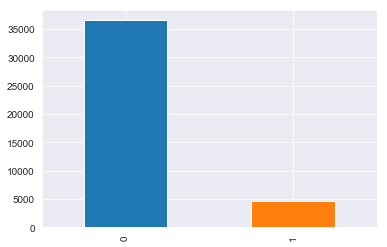

In [34]:
#Check the percentage of 0 to 1
No_sub = len(df[df['y'] == 0])
Sub = len(df[df['y'] == 1])
percent_No_sub = (No_sub/len(df['y'])) * 100
percent_sub = (Sub/len(df['y'])) * 100

print('Percentage of subsription : ',percent_sub)
print('Percentage of no subscription : ', percent_No_sub)


df['y'].value_counts().plot.bar()

clearly, 'y' column has an imbalanced data

### Visualization

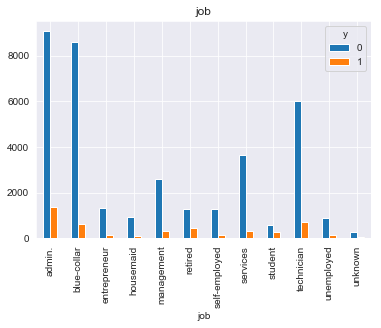

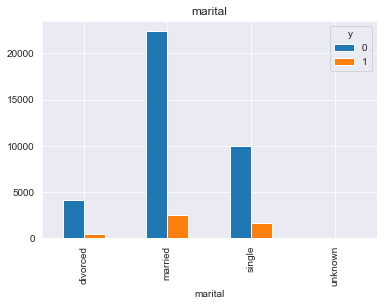

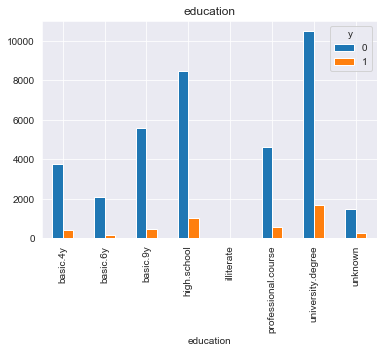

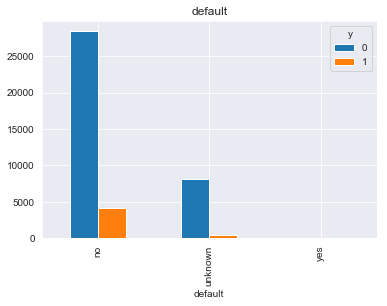

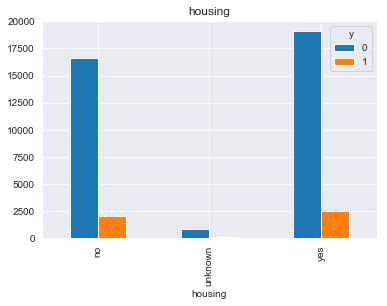

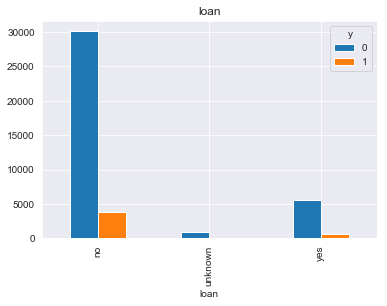

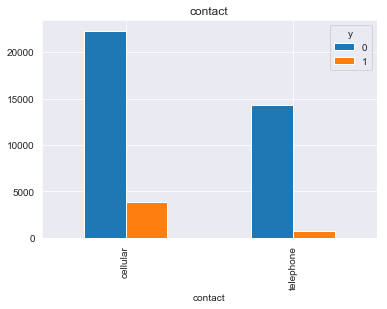

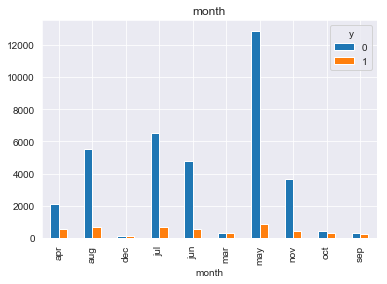

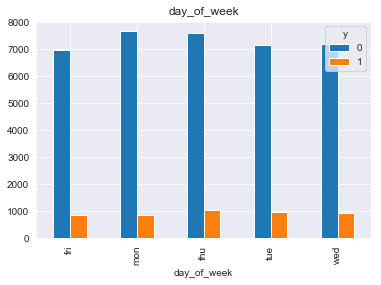

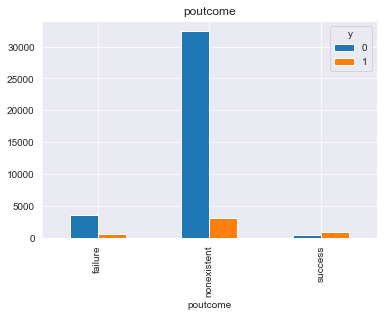

In [35]:
#Visualization from our categorical datas top see if we can get insigts from there
for col in cat_col:
    pd.crosstab(df[col], df.y).plot(kind = 'bar')
    plt.title(col)

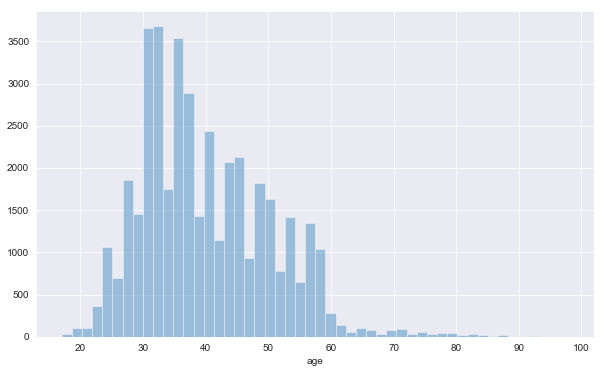

In [36]:
plt.figure(figsize = (10,6))
sns.distplot(a = df['age'], kde = False)

### Feature engineering

In [37]:
contact = ({'cellular':0, 'telephone':1})
df['contact'] = df['contact'].map(contact)

In [38]:
#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day_of_week','poutcome'], drop_first = True)

In [39]:
df.shape

(41188, 54)

### Preprocessing

In [40]:
#Resample technique using oversampling minority class
from sklearn.utils import resample

In [41]:
#Advisable to always split your data before using oversampling techniques
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

In [43]:
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  28831 
shape of y_train :  28831

shape of X_test  :  12357 
shape of y_test  :  12357


In [44]:
#concatenate our training data back together
X = pd.concat([X_train, y_train], axis = 1)

#separate minority class from majority
no_sub = X[X['y'] == 0]
sub = X[X['y'] == 1]

#upsample minority
sub_upsampled = resample(sub, replace = True, n_samples = len(no_sub), random_state = 0)

#combine majority and upsampled minority
upsampled = pd.concat([no_sub, sub_upsampled])

In [45]:
upsampled['y'].value_counts()

1    25567
0    25567
Name: y, dtype: int64

In [46]:
X_train = upsampled.loc[:,upsampled.columns != 'y']
y_train = upsampled.loc[:,upsampled.columns == 'y']

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Modelling

In [50]:
#train model using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.8731568036922596

In [53]:
clf.score(X_test,y_test)

0.859998381484179

In [51]:
y_pred = clf.predict(X_test)

### Model Evaluation

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[9406, 1575],
       [ 155, 1221]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10981
           1       0.44      0.88      0.58      1376

   micro avg       0.86      0.86      0.86     12357
   macro avg       0.71      0.87      0.75     12357
weighted avg       0.92      0.86      0.88     12357

